# <center>Predict Success of Bank Telemarketing</center>

This notebook based on the dataset from UCI Machine Learning Repository Bank Marketing Dataset which can be found at the following link. https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
## Dataset Information 
<br>The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Attribute Information
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
21. y: has the client subscribed a term deposit? (binary: 'yes', 'no')

## Add Dataset

### Add dataset from your computer

In [ ]:
df = pd.read_csv("path-to-your-csv-file")

### Add dataset from cloud object storage

In [1]:
# ========== load bank-additional.csv or bank-additional-full.csv dataset here ==========

"""
    press the "Find and add data" button which is second from upper right corner with zeros and one signs on it  then
    browse data from your local system  finally press "Insert to code" and "Insert Pandas DataFrame". Change df_data_1
    to df and add delimiter=";" to pd.read_csv() method. like this => df = pd.read_csv(body, delimiter=";")

""";

# df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Import Packages

In [2]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.dtypes.sort_values()

age                 int64
previous            int64
pdays               int64
campaign            int64
duration            int64
nr.employed       float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
housing            object
loan               object
contact            object
month              object
day_of_week        object
education          object
marital            object
job                object
poutcome           object
default            object
y                  object
dtype: object

In [6]:
cat_columns = []
for col in df.columns:
    if df[col].dtypes == object and col != "y":
        cat_columns.append(col)

In [7]:
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [8]:
for cat_column in cat_columns:
    print(cat_column,"\n")
    print(df[cat_column].unique(),"\n")
    print(len(df[cat_column].unique()))
    print("=============")

job 

['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown'] 

12
marital 

['married' 'single' 'divorced' 'unknown'] 

4
education 

['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate'] 

8
default 

['no' 'unknown' 'yes'] 

3
housing 

['yes' 'no' 'unknown'] 

3
loan 

['no' 'unknown' 'yes'] 

3
contact 

['cellular' 'telephone'] 

2
month 

['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec'] 

10
day_of_week 

['fri' 'wed' 'mon' 'thu' 'tue'] 

5
poutcome 

['nonexistent' 'failure' 'success'] 

3


In [9]:
for cat_column in cat_columns:
    vals = df[cat_column].value_counts().tolist()
    labels = list(df[cat_column].unique())
    
    data = [go.Bar(x=labels, y=vals)]
    layout = go.Layout(title=cat_column)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


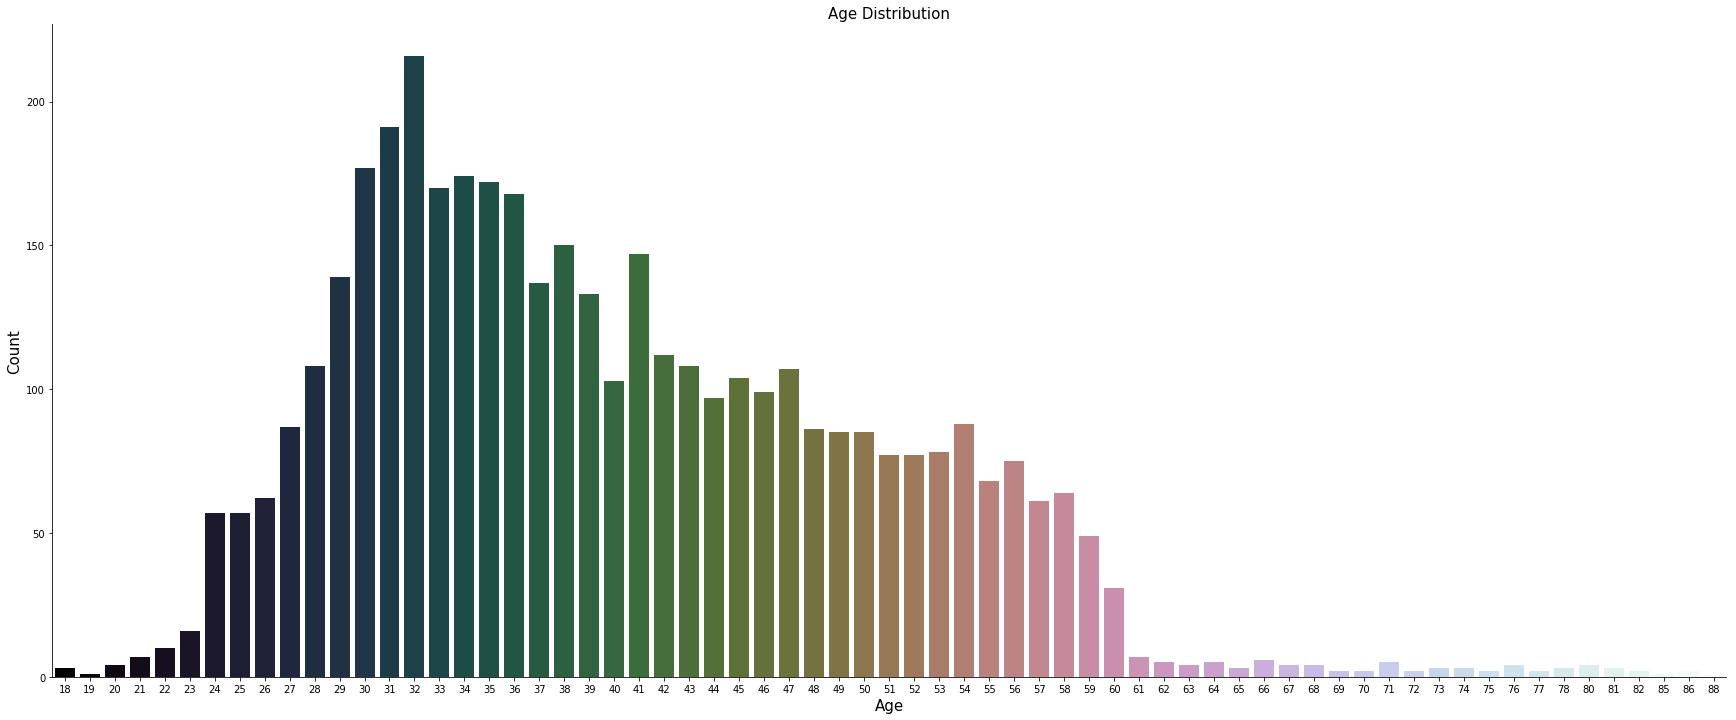

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="cubehelix", data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

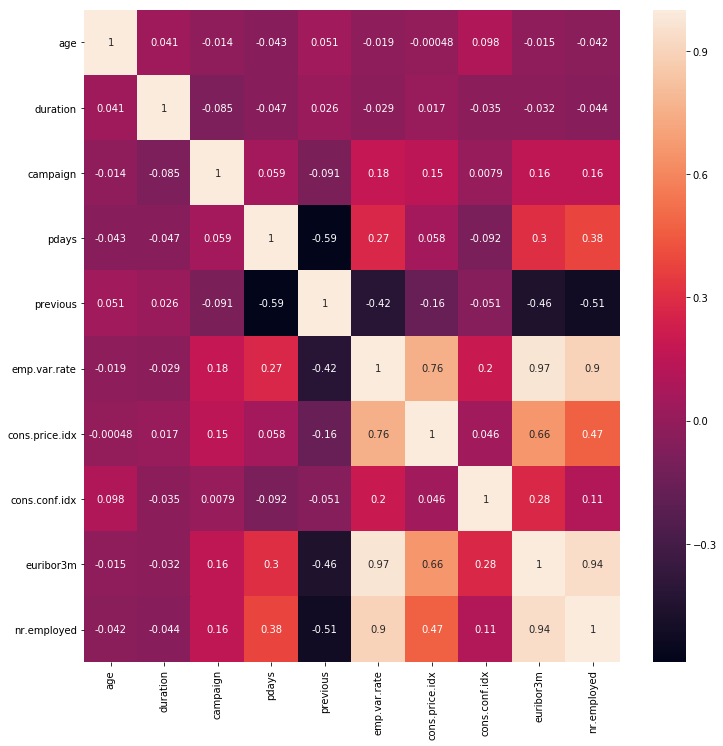

In [12]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [14]:
to_drop = ['cons.price.idx', 'euribor3m', 'nr.employed']
df.drop(df[to_drop], axis=1, inplace=True)

In [15]:
df = pd.get_dummies(df)

In [16]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,-46.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,-36.4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,-41.8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,-41.8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,-42.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [17]:
df.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.conf.idx                    float64
y                                  int64
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_basic.

In [18]:
df.shape

(4119, 61)

In [19]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,-46.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,-36.4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,-41.8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,-41.8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,-42.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [20]:
df["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [21]:
df["y"].value_counts() / df["y"].count()

0    0.890507
1    0.109493
Name: y, dtype: float64

In [22]:
X = df.drop("y", axis=1)
y = df[["y"]]

In [23]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,-46.2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,-36.4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,-41.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,-41.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,-42.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [24]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3089, 60), (3089, 1), (1030, 60), (1030, 1))

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [28]:
X_train

array([[-1.55767644, -0.7640543 ,  0.19071824, ..., -0.3540039 ,
         0.41829591, -0.19752931],
       [ 1.24982051, -0.868046  , -0.60540153, ..., -0.3540039 ,
         0.41829591, -0.19752931],
       [-0.88000476, -0.64806355, -0.60540153, ..., -0.3540039 ,
         0.41829591, -0.19752931],
       ...,
       [-1.26724572, -0.78805238, -0.60540153, ..., -0.3540039 ,
         0.41829591, -0.19752931],
       [-0.58957405, -0.38008493,  0.986838  , ..., -0.3540039 ,
         0.41829591, -0.19752931],
       [-0.976815  , -0.34808748, -0.60540153, ...,  2.82482763,
        -2.39065208, -0.19752931]])

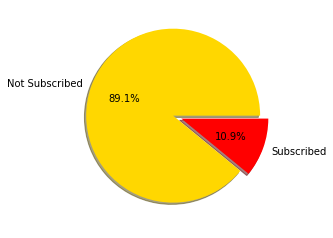

In [29]:
labels = 'Not Subscribed', 'Subscribed'
sizes = [(df['y'].value_counts()[0] / len(df)),(df['y'].value_counts()[1] / len(df))]
colors = ['gold', 'red']
explode = (0.1, 0)

plt.pie(sizes,labels=labels, colors=colors, shadow=True, explode=explode, autopct='%1.1f%%')

plt.show()

Accuracy is not good metric if the classes are unevenly distributed.

<img src="https://cdn-images-1.medium.com/max/1000/1*tfgp1czHTBMfSbIM2EHnNA.png" width=1500 height=1500></img>

TP: Model predicts that client subscribed to term deposit and the client actually subscribed to term deposit.

TN: Model predicts that client do not subscribed to term deposit and the client actually do not subscribed to term deposit.

FP: Model predicts that client subscribed to term deposit and the client actually do not subscribed to term deposit.

FN: Model predicts that client do not subscribed to term deposit and the client actually subscribed to term deposit.


To decrease FP, we should look at Precision metric.

In [30]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [40]:
#log_reg_model = LogisticRegression(penalty='l1', class_weight={0: 0.8, 1:0.2}) 
log_reg_model = LogisticRegression() 
training_time = time.time()
log_reg_model.fit(X_train,y_train)
log_pred = log_reg_model.predict(X_test)

print("Logistic Regression\n")
print(confusion_matrix(log_pred, y_test))
tn, fn, fp, tp = confusion_matrix(log_pred, y_test).ravel()
print("\ntn, fn, fp, tp:",tn, fn, fp, tp)
log_reg_cv = cross_val_score(log_reg_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean()
print("\ntraining time:", time.time()- training_time)
print("\nPrecision Score:",log_reg_cv)

Logistic Regression

[[917  93]
 [  4  16]]

tn, fn, fp, tp: 917 93 4 16

training time: 0.6573467254638672

Precision Score: 0.7883549783549784


In [32]:
svc= SVC()
training_time = time.time()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("Support Vector Machine")
print(confusion_matrix(svc_pred, y_test))
tn, fn, fp, tp = confusion_matrix(svc_pred, y_test).ravel()
print("\ntn, fn, fp, tp:",tn, fn, fp, tp)
svc_cv = cross_val_score(svc, X_train, y_train, cv=k_fold, scoring = 'precision').mean()
print("\ntraining time:", time.time()- training_time)
print("\nPrecision Score:",svc_cv)

Support Vector Machine
[[900  80]
 [ 21  29]]

tn, fn, fp, tp: 900 80 21 29

training time: 4.334786653518677

Precision Score: 0.7187360295288684


In [34]:
xgb = XGBClassifier()
training_time = time.time()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost\n")
print(confusion_matrix(xgb_pred, y_test))
tn, fn, fp, tp = confusion_matrix(xgb_pred, y_test).ravel()
print("\ntn, fn, fp, tp:",tn, fn, fp, tp)
xgb_cv = cross_val_score(xgb, X_train, y_train, cv=k_fold, scoring = 'precision').mean()
print("\ntraining time:", time.time()- training_time)
print("\nPrecision Score:",xgb_cv)

XGBoost

[[892  60]
 [ 29  49]]

tn, fn, fp, tp: 892 60 29 49

training time: 3.955580472946167

Precision Score: 0.7090328673784051


In [35]:
algorithms = ["Logistic Regression", "Support Vector Machine", "XGBoost"]
scores = [log_reg_cv, svc_cv, xgb_cv]

In [36]:
results = pd.DataFrame({"Algorithm": algorithms, "Score": scores})

In [37]:
results.sort_values(by="Score", ascending=False).reset_index(drop=True)

,Algorithm,Score
0,Support Vector Machine,0.718736
1,XGBoost,0.709033
2,Logistic Regression,0.681132
